In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import h5py
import tensorflow_datasets as tfds


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [4]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded 

In [5]:
class Autoencoder_3D(Model):
  def __init__(self, latent_dim):
    super(Autoencoder_3D, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(12288, activation='sigmoid'),
      layers.Reshape((64, 64,3))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded 

In [6]:
def train_plot():   
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(x_train[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs_t[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [7]:
def train_plot_3D():   
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(train[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs_t[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [8]:
def test_plot():
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(x_test[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [9]:
def test_plot_3D():
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(test[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [10]:
def plot_MSE_loss_result(loss,val_loss):         
    plt.figure()
    plt.title('mean square error(epochs-loss)',fontsize=18)
    epochs=[0,1,2,3,4,5,6,7,8,9]
    plt.plot(epochs, loss, 'c', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        
    plt.show()

In [11]:
def plot_L1_loss_result(loss,val_loss):         
    plt.figure()
    plt.title('L1 error(epochs-loss)',fontsize=18)
    epochs=[0,1,2,3,4,5,6,7,8,9]
    plt.plot(epochs, loss, 'c', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        
    plt.show()

In [13]:
#mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0976 - val_loss: 0.0329
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0293 - val_loss: 0.0203
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0190 - val_loss: 0.0145
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0140 - val_loss: 0.0112
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0054 - val_loss: 0.004

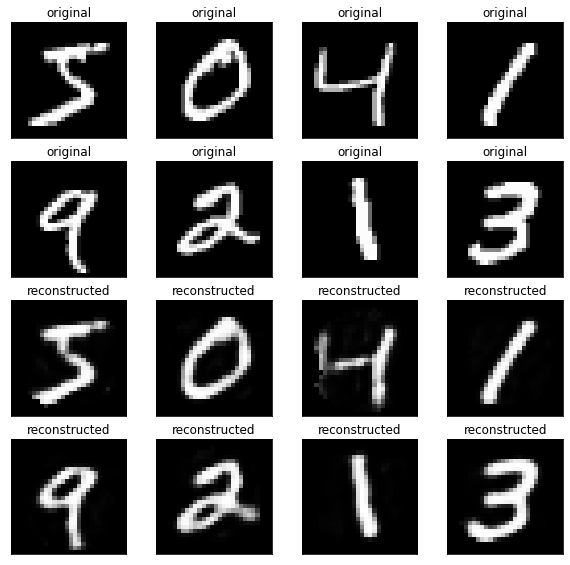

******Testing Data******


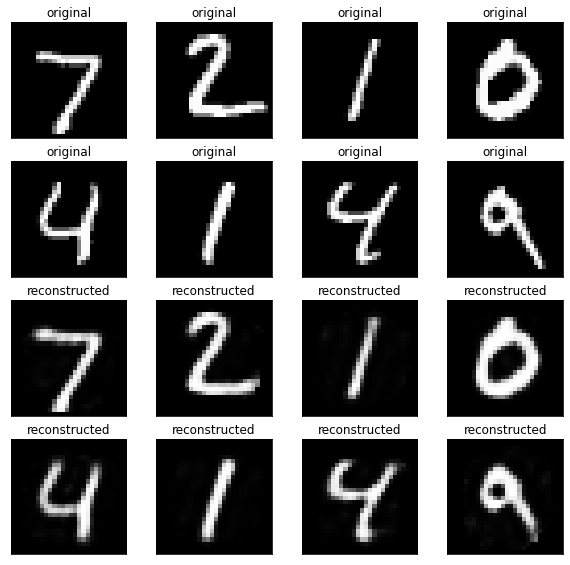

 
******loss******


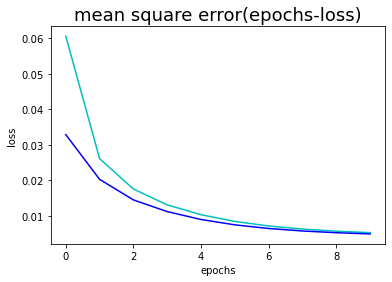

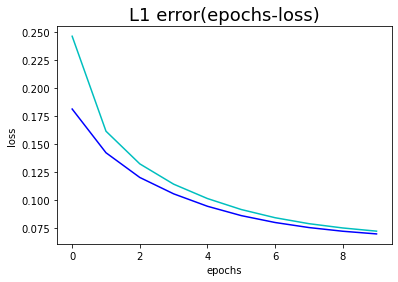

In [9]:
#latent_dim = 64 
autoencoder = Autoencoder(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1085 - val_loss: 0.0409
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0376 - val_loss: 0.0293
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0278 - val_loss: 0.0231
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0223 - val_loss: 0.0192
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0188 - val_loss: 0.0164
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0145
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0145 - val_loss: 0.0131
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0132 - val_loss: 0.0122
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0110

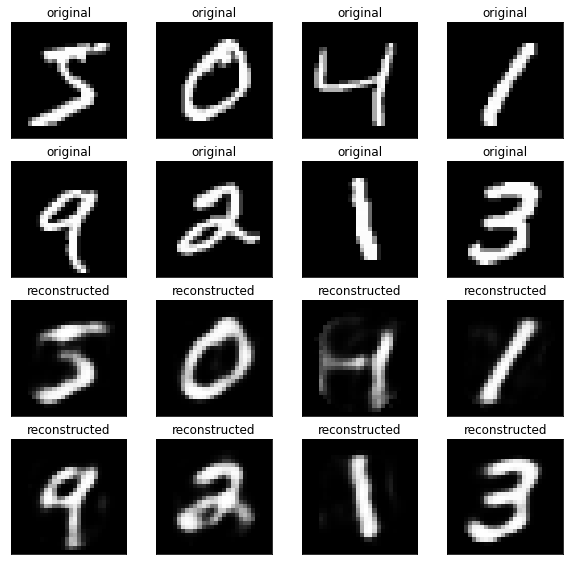

******Testing Data******


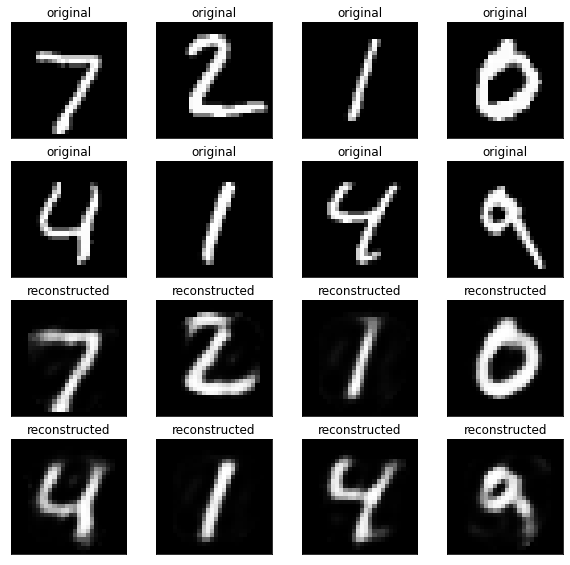

 
******loss******


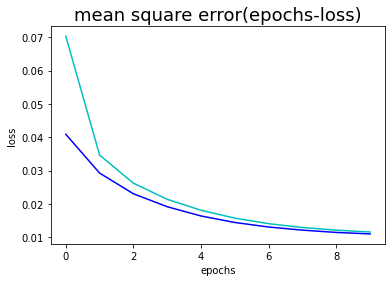

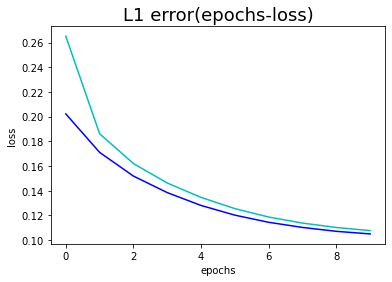

In [10]:
#latent_dim = 32
autoencoder = Autoencoder(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - val_loss: 0.0505
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0494 - val_loss: 0.0481
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0479 - val_loss: 0.0471
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0472 - val_loss: 0.0467
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - val_loss: 0.0464
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0468 - val_loss: 0.0463
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0467 - val_loss: 0.0463
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0466 - val_loss: 0.0462
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - val_loss: 0.0461
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.046

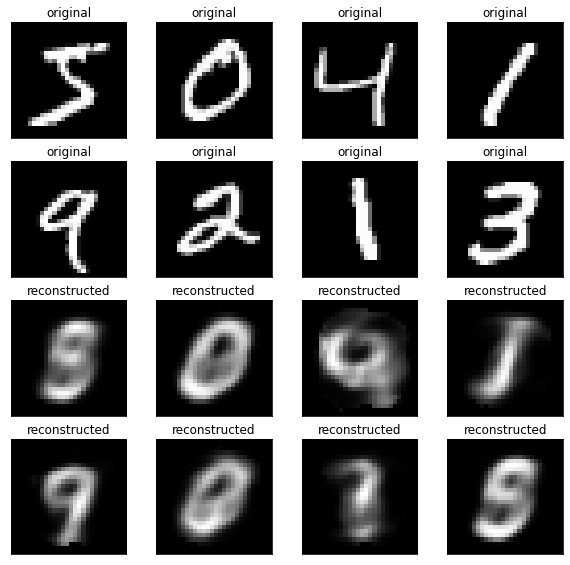

******Testing Data******


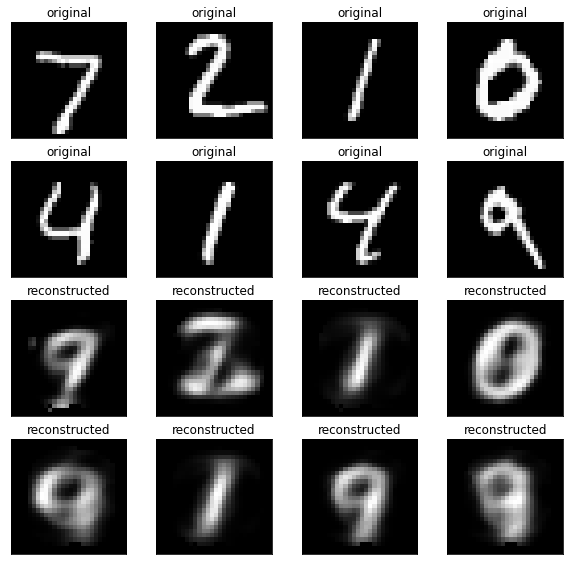

 
******loss******


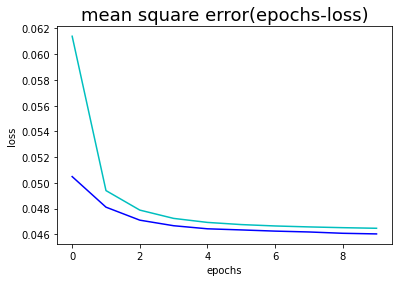

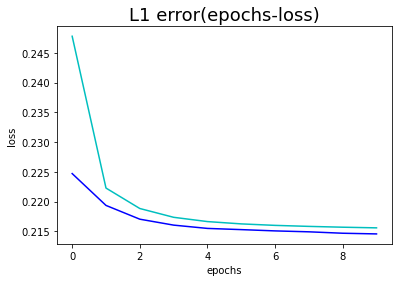

In [14]:
#latent_dim = 4 
autoencoder = Autoencoder(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                #batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

In [2]:
#fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0401 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

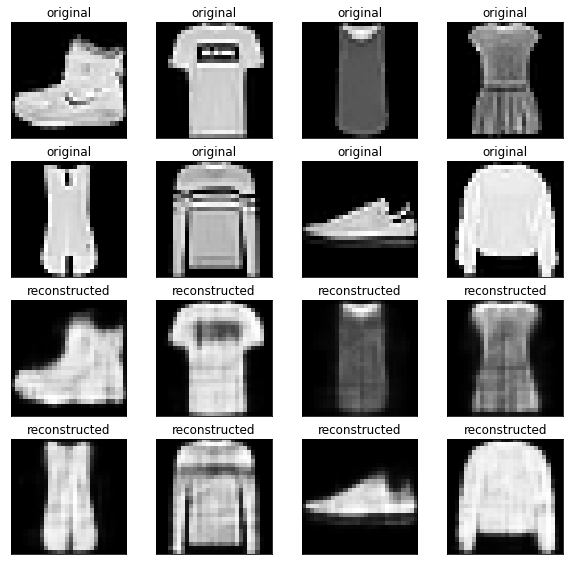

******Testing Data******


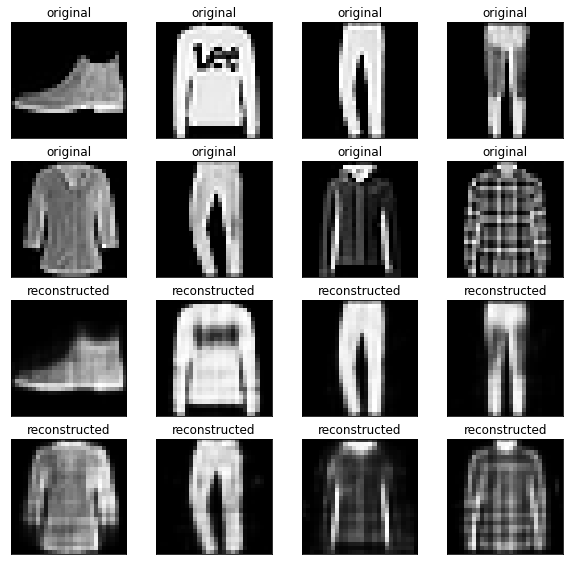

 
******loss******


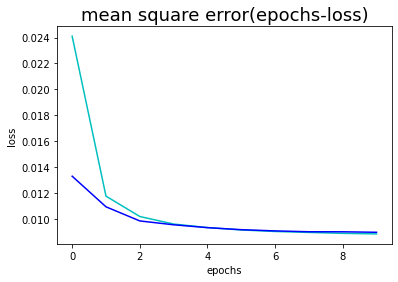

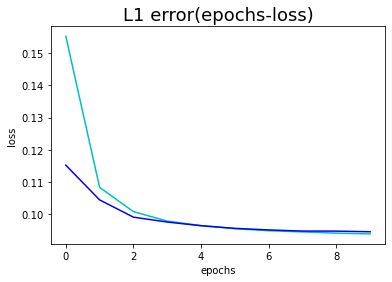

In [8]:
#latent_dim = 64 
autoencoder = Autoencoder(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - val_loss: 0.0168
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157 - val_loss: 0.0139
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.012

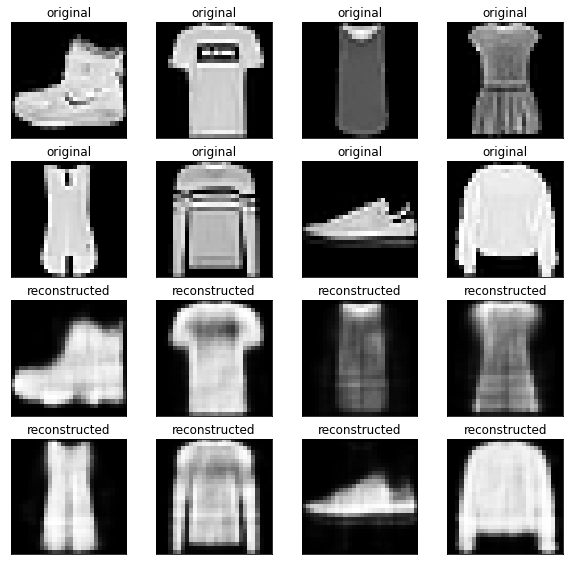

******Testing Data******


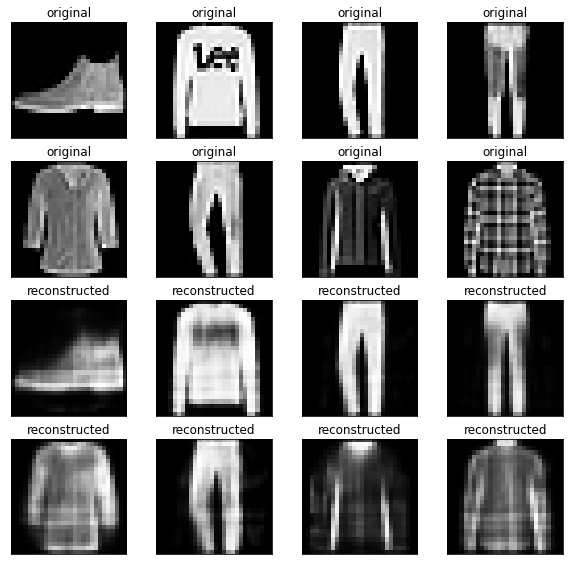

 
******loss******


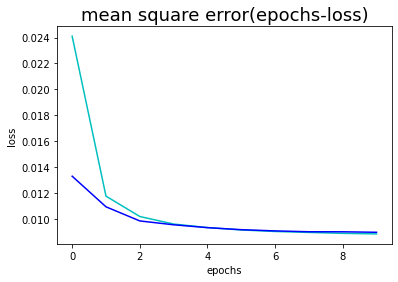

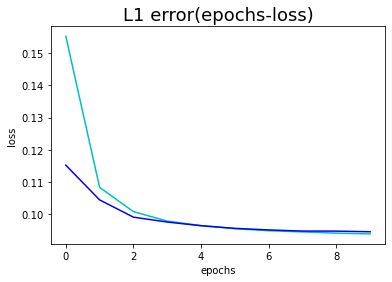

In [9]:
#latent_dim = 32
autoencoder = Autoencoder(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0685 - val_loss: 0.0377
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - val_loss: 0.0340
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0336 - val_loss: 0.0330
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - val_loss: 0.0327
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - val_loss: 0.0327
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0327 - val_loss: 0.0325
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0325 - val_loss: 0.0324
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.032

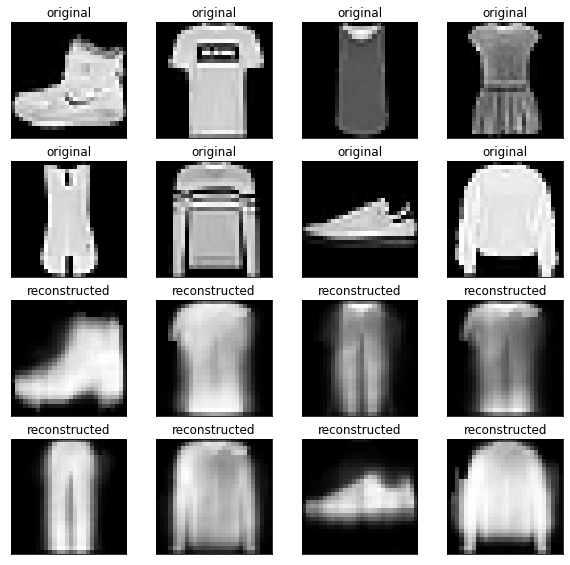

******Testing Data******


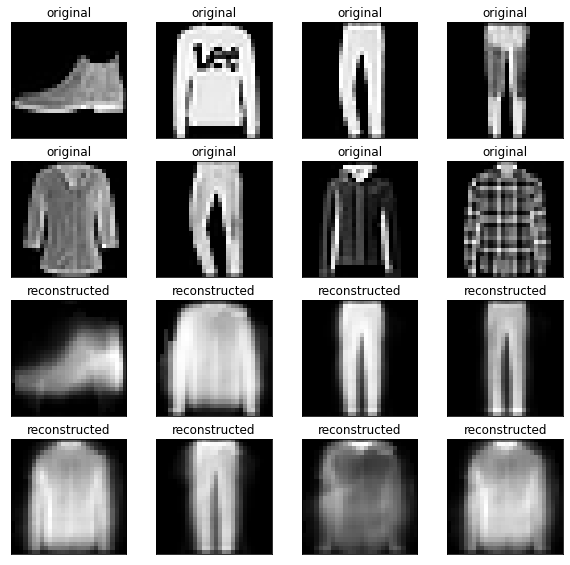

 
******loss******


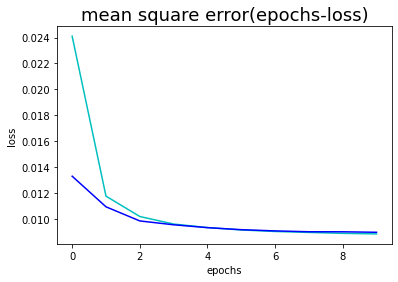

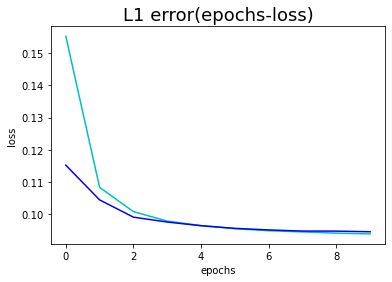

In [10]:
#latent_dim = 4
autoencoder = Autoencoder(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

In [16]:
# 3d shape 
train_ds = tfds.load('shapes3d', split='train')
train=[]
test=[]

In [17]:
print(type(train_ds))
for i ,j in enumerate(train_ds):
    if i <24000:
        train.append(j['image'])
    elif i <48000 and i>=24000:
        test.append(j['image'])
    

train=np.array(train)
test=np.array(test)


<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>


In [18]:
print(train.shape)
print(test.shape)

(24000, 64, 64, 3)
(24000, 64, 64, 3)


Epoch 1/10
750/750 [==============================] - 20s 27ms/step - loss: 30327.7090 - val_loss: 30311.1953
Epoch 2/10
750/750 [==============================] - 19s 26ms/step - loss: 30326.9980 - val_loss: 30311.1738
Epoch 3/10
750/750 [==============================] - 20s 26ms/step - loss: 30327.0215 - val_loss: 30311.1738
Epoch 4/10
750/750 [==============================] - 20s 27ms/step - loss: 30326.9980 - val_loss: 30311.1738
Epoch 5/10
750/750 [==============================] - 20s 26ms/step - loss: 30327.0137 - val_loss: 30311.1738
Epoch 6/10
750/750 [==============================] - 19s 25ms/step - loss: 30327.0293 - val_loss: 30311.1738
Epoch 7/10
750/750 [==============================] - 19s 25ms/step - loss: 30326.9980 - val_loss: 30311.1738
Epoch 8/10
750/750 [==============================] - 19s 26ms/step - loss: 30327.0000 - val_loss: 30311.1738
Epoch 9/10
750/750 [==============================] - 20s 26ms/step - loss: 30327.0078 - val_loss: 30311.1738
Epoch 10/1

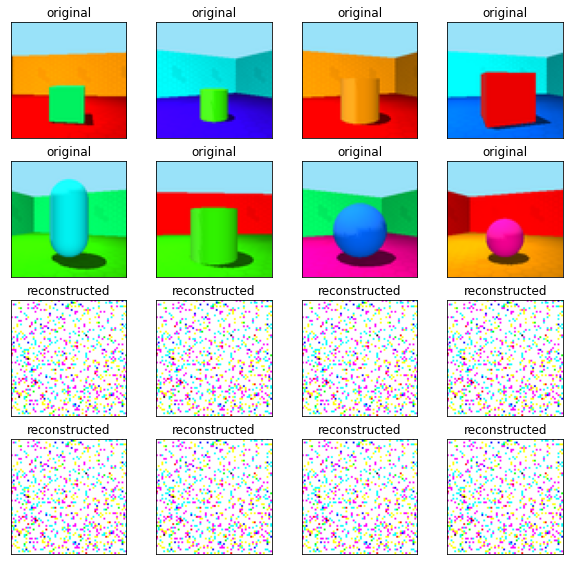

******Testing Data******


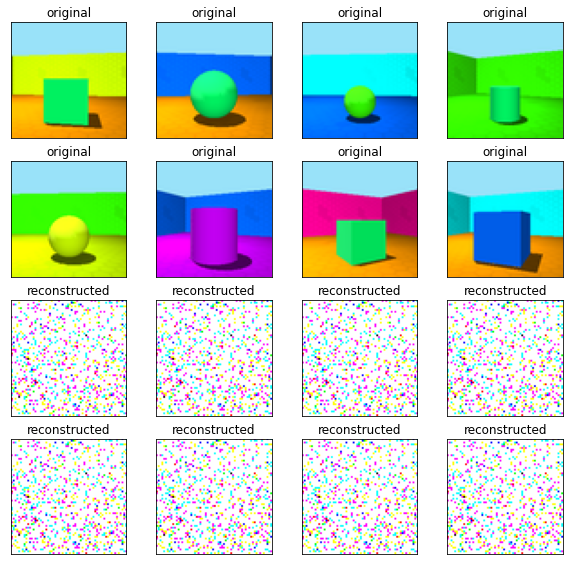

 
******loss******


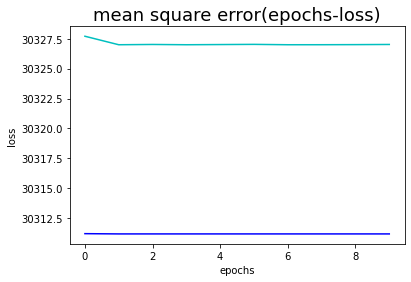

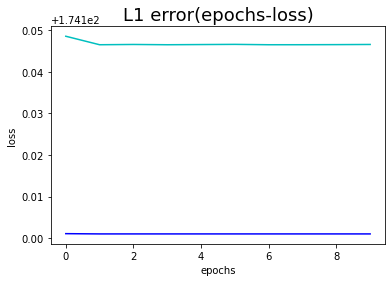

In [32]:
#latent_dim = 64 
autoencoder = Autoencoder_3D(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
750/750 [==============================] - 16s 21ms/step - loss: 30333.5996 - val_loss: 30316.3301
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 30330.5703 - val_loss: 30309.5234
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 30325.3438 - val_loss: 30309.4805
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 30325.3223 - val_loss: 30308.9414
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 30323.9688 - val_loss: 30308.0059
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 30323.9336 - val_loss: 30308.0059
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 30323.9395 - val_loss: 30308.0059
Epoch 8/10
750/750 [==============================] - 15s 20ms/step - loss: 30323.9180 - val_loss: 30308.0059
Epoch 9/10
750/750 [==============================] - 16s 21ms/step - loss: 30323.9062 - val_loss: 30308.0059
Epoch 10/1

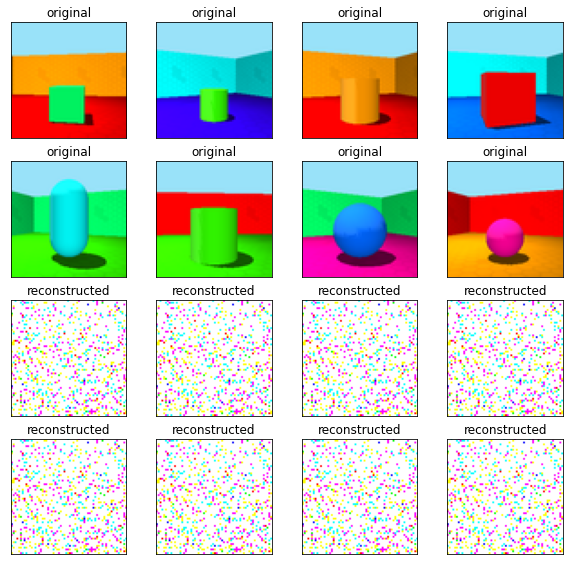

******Testing Data******


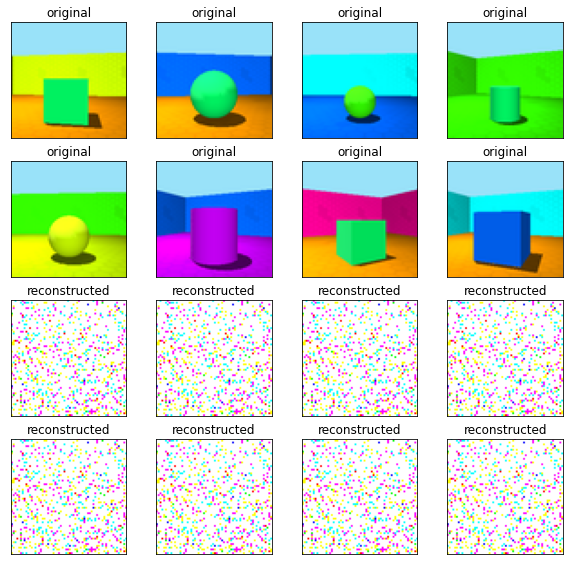

 
******loss******


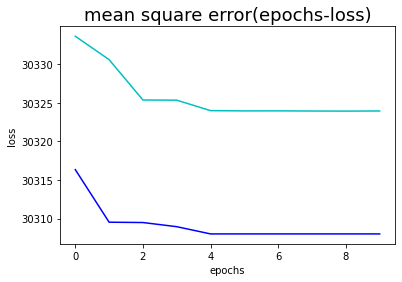

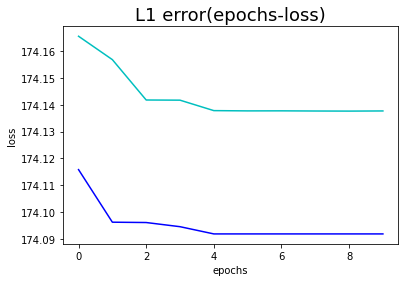

In [34]:
#latent_dim = 32
autoencoder = Autoencoder_3D(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

In [20]:
#latent_dim = 4
autoencoder = Autoencoder_3D(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
   1/1500 [..............................] - ETA: 0s - loss: 31013.9980WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0147s). Check your callbacks.


1500/1500 [==============================] - 10s 6ms/step - loss: 30334.4746 - val_loss: 30317.4512
Epoch 2/10
 567/1500 [==========>...................] - ETA: 3s - loss: 30337.8906

KeyboardInterrupt: 